In [1]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

import matplotlib.pyplot as plt
import csv
import os
import pandas as pd
import random

import numpy as np
from sklearn import model_selection, svm, naive_bayes
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report
#from keras.preprocessing import text, sequence
#import gensim
#from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

filelist=os.listdir("/Users/veronica/Documents/research/standard")[1:]
path1 = "/Users/veronica/Documents/research/standard"

In [3]:
len(filelist)

186

In [ ]:
trainDF['text'] = sentence
trainDF['label'] = label
begin=0
for i in len(filelist):
   
    validx=trainDF['text'][begin:len(filelist[i])]
    validy=trainDF['label'][begin:len(filelist[i])]
    begin=len( filelist[i])
    

In [56]:
filelist[0]

'10535857(1).csv'

In [49]:
end=len(filelist[0])
validx=trainDF['text'][0:end]
validy=trainDF['label'][0:end]
trainx=trainDF['text'][end:]
trainy=trainDF['label'][end:]

In [57]:
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,3), max_features=5000, 
                                   stop_words='english', lowercase=True, strip_accents='unicode')
tfidf_vect_ngram.fit(trainDF['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(sentence[:100])
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(validx)

In [4]:
def count1(label):
    count=0
    for i in label:
        if i=='1':
            count+=1
    return count

In [18]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

In [11]:
print(len(train_y),len(valid_y))

20355 6785


In [95]:
#Count Vector
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['text'])
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)


In [22]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDF['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)


In [2]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return predictions

In [232]:
def check_results(predictions, classifications):
    print("accuracy")
    print(accuracy_score(classifications,predictions))
    print(classification_report(classifications,predictions))
    

In [15]:
# SVM on Ngram Level TF IDF Vectors
predictions=train_model(svm.SVC(), xtrain_tfidf_ngram, np.array(train_y), xvalid_tfidf_ngram)
check_results(predictions, np.array(valid_y))

accuracy
0.9717022844509948
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      6593
          1       0.00      0.00      0.00       192

avg / total       0.94      0.97      0.96      6785



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
predictions1=train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
check_results(predictions1, np.array(valid_y))

accuracy
0.9709653647752395
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      6593
          1       0.27      0.02      0.03       192

avg / total       0.95      0.97      0.96      6785



In [168]:
count1(predictions1)

5

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

from sklearn import cross_validation 

predictions = cross_validation.cross_val_predict(clf, xtrain_tfidf_ngram,train_y, cv=10)



/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [172]:
len(predictions) 

20355

In [19]:
check_results(predictions, np.array(train_y))

accuracy
0.9670351265045444
             precision    recall  f1-score   support

          0       0.97      1.00      0.98     19757
          1       0.11      0.02      0.03       598

avg / total       0.95      0.97      0.96     20355



In [ ]:
split articles leave one out plot 1 recall
reduce number into NuM
add feature 
svm.SVC() parameters  linear scv(c=)

In [147]:
## take in sents and Q2 label
filelist=os.listdir("/Users/veronica/Documents/research/standard")[1:]
sentence= {}
label={}
path1 = "/Users/veronica/Documents/research/standard"
for k in range(len(filelist)):
 
    f1=open(os.path.join(path1, filelist[k]), 'r',encoding = 'unicode_escape')
    reader = csv.reader(f1)
    rows= [row for row in reader]
    sentence[k]=[]
    label[k]=[]      
    for i in range(1,len(rows)):
        sentence[k].append(rows[i][1])
        label[k].append(rows[i][3])

In [149]:
## take in sents and Q2 label
filelist=os.listdir("/Users/veronica/Documents/research/standard")[1:]
sentence= []

path1 = "/Users/veronica/Documents/research/standard"
for k in range(len(filelist)):
 
    f1=open(os.path.join(path1, filelist[k]), 'r',encoding = 'unicode_escape')
    reader = csv.reader(f1)
    rows= [row for row in reader]

   
    for i in range(1,len(rows)):
        sentence.append(rows[i][1])
 

In [150]:
len(sentence)

31740

In [4]:
# split
def randomsplit(n):
    sub=random.sample(range(1, 165), n)
    trainx=[]
    trainy=[]
    validx=[]
    validy=[]
    for key in sentence.keys():
        if key in sub:
            validx.extend(sentence[key])
            validy.extend(label[key])
        else:
            trainx.extend(sentence[key])
            trainy.extend(label[key])
    return trainx,trainy,validx,validy

In [5]:
def split(s,e):
    trainx=[]
    trainy=[]
    validx=[]
    validy=[]
    for key in sentence.keys():
        if key in range(s,e):
            validx.extend(sentence[key])
            validy.extend(label[key])
        else:
            trainx.extend(sentence[key])
            trainy.extend(label[key])
    return trainx,trainy,validx,validy

In [18]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import recall_score,precision_score
from nltk.corpus import stopwords
import string
import re
import spacy
nlp=spacy.load("en_core_web_sm")
from spacy.lang.en import English
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))

from nltk.stem.porter import *
stemmer = PorterStemmer()

In [5]:

def tokenizeText(sample):
    token = nlp(sample)
    tokens=[]
    
    for tok in token:
        if str(tok).isdigit():#number
            tokens.append('NUM')
        if str(tok).isalpha():
            tokens.append(tok.lower_)
    tokens = [tok for tok in tokens if tok not in STOPLIST]       
    return tokens

In [356]:
def svm_recall():
#random pick 15 from 165 for test
    trainx,trainy,validx,validy=randomsplit(15)
#tfidf
    vectorizer = TfidfVectorizer(tokenizer=tokenizeText, ngram_range=(2,3), max_features=5000)
    a1 = vectorizer.fit_transform(training_data)
    a2 = one-hot-encoder
    np.append(a1,a2)
    
#linearSVC
    clf1 = LinearSVC(C=1.5)
    pipe = Pipeline([('vectorizer', vectorizer), ('clf', clf1)])
# train
    pipe.fit(trainx, trainy)
# test
    preds = pipe.predict(validx)
#recall score
    return recall_score(np.array(validy), preds,average=None)[1]
# 10 times
recall=[]
for i in range(10):
    recall.append(svm_recall(1.5))

In [23]:
def svm_best():
#random pick 15 from 165 for test
    trainx,trainy,validx,validy=randomsplit(15)
#tfidf
    vectorizer = TfidfVectorizer(tokenizer=tokenizeText, ngram_range=(1,2), max_features=5000)
#linearSVC
    clf1 = LinearSVC(C=1.5)
    pipe = Pipeline([('vectorizer', vectorizer), ('clf', clf1)])
# train
    pipe.fit(trainx, trainy)
# test
    preds = pipe.predict(validx)
#recall score
    return recall_score(np.array(validy), preds,average=None)[1]
# 10 times
best=[]
for i in range(10):
    best.append(svm_best())

In [ ]:
AUC
mean sd

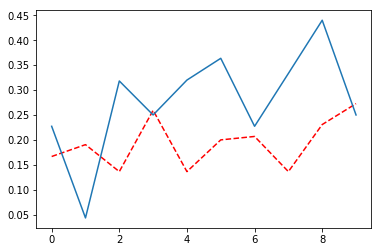

[0.22727272727272727,
 0.043478260869565216,
 0.3181818181818182,
 0.25,
 0.32,
 0.36363636363636365,
 0.22727272727272727,
 0.3333333333333333,
 0.44,
 0.25]

In [27]:
plt.plot(recall,"r--")
plt.plot(best) 
plt.show()
best

In [26]:

recall

[0.16666666666666666,
 0.19047619047619047,
 0.13636363636363635,
 0.25925925925925924,
 0.13636363636363635,
 0.2,
 0.20689655172413793,
 0.13636363636363635,
 0.23076923076923078,
 0.2727272727272727]

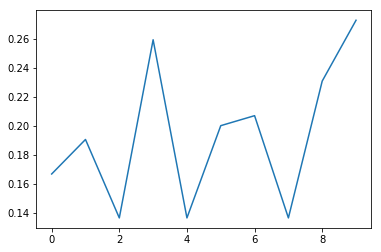

In [359]:
plt.plot(recall)
plt.show()

In [ ]:
# successive 15 articles for testing
recall1=[]
vectorizer = TfidfVectorizer(tokenizer=tokenizeText, ngram_range=(2,3), max_features=5000)
clf1 = LinearSVC(C=1.5)
pipe = Pipeline([('vectorizer', vectorizer), ('clf', clf1)])
for i in range(0,len(sentence)-10,10):
    trainx,trainy,validx,validy=split(i,i+15)
    pipe.fit(trainx, trainy)
    preds = pipe.predict(validx)
    recall1.append(recall_score(np.array(validy), preds,average=None)[1])

In [15]:
recall1

[0.20833333333333334,
 0.21739130434782608,
 0.2222222222222222,
 0.0,
 0.08695652173913043,
 0.09090909090909091,
 0.25,
 0.4117647058823529,
 0.13636363636363635,
 0.1724137931034483,
 0.17857142857142858,
 0.34615384615384615,
 0.1111111111111111,
 0.041666666666666664,
 0.20833333333333334,
 0.10526315789473684]

In [377]:
recall2=[]
vectorizer = TfidfVectorizer(tokenizer=tokenizeText, ngram_range=(2,3), max_features=5000)
clf1 = LinearSVC(C=0.5)
pipe = Pipeline([('vectorizer', vectorizer), ('clf', clf1)])
for i in range(0,len(sentence)-10,10):
    trainx,trainy,validx,validy=split(i,i+15)
    pipe.fit(trainx, trainy)
    preds = pipe.predict(validx)
    recall2.append(recall_score(np.array(validy), preds,average=None)[1])

In [21]:
recall3=[]
vectorizer = TfidfVectorizer(tokenizer=tokenizeText, ngram_range=(1,2))
clf1 = LinearSVC(C=1.5)
pipe = Pipeline([('vectorizer', vectorizer), ('clf', clf1)])
for i in range(0,60,10):
    trainx,trainy,validx,validy=split(i,i+15)
    pipe.fit(trainx, trainy)
    preds = pipe.predict(validx)
    recall4.append(recall_score(np.array(validy), preds,average=None)[1])

In [9]:
recall3

[0.16666666666666666,
 0.21739130434782608,
 0.2777777777777778,
 0.15789473684210525,
 0.13043478260869565,
 0.13636363636363635,
 0.3333333333333333,
 0.5294117647058824]

In [14]:
recall2

[0.08333333333333333,
 0.17391304347826086,
 0.2222222222222222,
 0.0,
 0.08695652173913043,
 0.09090909090909091,
 0.25,
 0.35294117647058826,
 0.09090909090909091,
 0.10344827586206896,
 0.10714285714285714,
 0.23076923076923078,
 0.1111111111111111,
 0.041666666666666664,
 0.20833333333333334,
 0.10526315789473684]

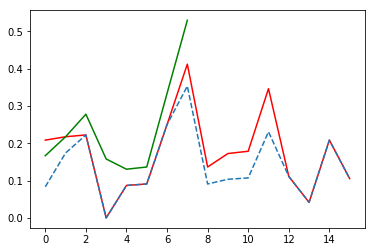

In [13]:

plt.plot(recall1,'r')
plt.plot(recall2,'--')
plt.plot(recall3,'g')
plt.show()

In [330]:
clf1 = LinearSVC(C=0.5)
vectorizer = TfidfVectorizer(tokenizer=tokenizeText, ngram_range=(2,3), max_features=5000)
pipe = Pipeline([('vectorizer', vectorizer), ('clf', clf1)])
trainx,trainy,validx,validy=split(0,10)
pipe.fit(trainx, trainy)
preds = pipe.predict(validx)
recall_score(np.array(validy), preds,average=None)[1]

0.058823529411764705

In [331]:
clf3 = LinearSVC(C=1.5)
pipe = Pipeline([('vectorizer', vectorizer), ('clf', clf3)])
trainx,trainy,validx,validy=split(0,10)
pipe.fit(trainx, trainy)
preds = pipe.predict(validx)
recall_score(np.array(validy), preds,average=None)[1]

0.11764705882352941

In [355]:
def tokenizeText1(sample):
    token = nlp(sample)
    tokens=[]
    for tok in token:
        if str(tok).isdigit():
            tokens.append('NUM')
        if str(tok).isalpha():
            tokens.append(tok.lower_)
    return tokens
vectorizer = TfidfVectorizer(tokenizer=tokenizeText1,lowercase=False,stop_words="english", ngram_range=(2,3), max_features=5000)
clf = LinearSVC(C=1.5)
pipe = Pipeline([('vectorizer', vectorizer), ('clf', clf)])
trainx,trainy,validx,validy=split(0,10)
pipe.fit(trainx, trainy)
preds = pipe.predict(validx)
recall_score(np.array(validy), preds,average=None)[1]

0.11764705882352941

In [347]:
pipe = Pipeline([('counts', CountVectorizer(tokenizer=tokenizeText,ngram_range=(2,3))), ('tf_idf', TfidfTransformer()), ('classifier', LinearSVC(C=1.5))])
trainx,trainy,validx,validy=split(0,10)
pipe.fit(trainx, trainy)
preds = pipe.predict(validx)
recall_score(np.array(validy), preds,average=None)[1]

0.058823529411764705

In [20]:
import pandas as pd
caps = pd.read_csv(os.path.join(path1, filelist[2]),encoding = 'unicode_escape', usecols = ['Sentence-String','Q2'])

In [21]:
caps.head()

,Sentence-String,Q2
0,Increased intraocular pressure (IOP) has been ...,0
1,Yet it has not been clearly demonstrated that ...,0
2,The aim of the current paper was to report the...,0
3,"We conducted a randomised, double-masked study...",0
4,Patients were followed at 3-month intervals pr...,0


In [146]:
X[399]

'there need incorpor addit step maxim practic complianc order facilit complet recommend amount session practis'

In [136]:
X = frame['cleaned']
Y = frame['Q2']  


In [65]:
vectorizer = TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l2', ngram_range=(1, 3),lowercase=False)
feature1 = vectorizer.fit_transform(frame['cleaned']).toarray()


In [63]:
x2=np.zeros(3)
for sents in X:
    flag=[]
    if "random" in sents:
        flag.append(1)
    else :
        flag.append(0)
    if ("patient" in sents or "subject" in sents) and "random" in sents:
        flag.append(1)
    else :
        flag.append(0)
        
    if ("allocate" in sents or "assign" in sents or "generate" in sents) and "random" in sents:
        flag.append(1)
    else :
        flag.append(0)
    x1 = np.array(flag)
    x2 = np.row_stack([x2,x1])
feature2 = np.delete(x2, 0, 0)

In [67]:
feature1.shape

(31740, 47681)

In [66]:
features=np.hstack((feature1,feature2))

KeyboardInterrupt: 

In [45]:
len(X[100])

181

In [69]:
vect= TfidfVectorizer(sublinear_tf=True, norm='l2',ngram_range=(1, 2),lowercase=False,)
pipeline= Pipeline([('vect', vectorizer),('clf', LinearSVC())])

from sklearn.grid_search import GridSearchCV

parameters = {
    'clf__C': [0.2,0.3,0.4,0.5,1.5],
    'vect__max_features':[10000,20000]
}

grid = GridSearchCV(pipeline, param_grid=parameters, cv=10)
grid.fit(X, Y)

In [90]:
grid.best_params_

{'clf__C': 0.4, 'vect__max_features': 20000}

In [107]:
tfidf_vect_ngram = TfidfVectorizer( sublinear_tf=True, norm='l2', ngram_range=(1, 2),lowercase=False,max_features=20000)
tfidf_vect_ngram.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=20000, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [345]:
sub=random.sample(range(1, 186), 15)
frame1 = pd.DataFrame()
list1 = []
frame2 = pd.DataFrame()
list2 = []
for i in range(len(filelist)):
    df = pd.read_csv(os.path.join(path1, filelist[i]),encoding = 'unicode_escape', usecols = ['Sentence-String','Q2'])
    df['cleaned'] = df['Sentence-String'].apply(lambda x: " ".join([lemmatizer.lemmatize(i) for i in x.split() if (str(i).isalpha() and i not in swords and len(i)>1)]).lower())
    if i in sub:
        list1.append(df)
    else:
        list2.append(df)
frame1 = pd.concat(list1)
frame2 = pd.concat(list2)
Xtrain = frame2['cleaned']
Xvalid = frame1['cleaned']
Yvalid = np.array(frame1['Q2']) 
Ytrain = np.array(frame2['Q2'])

In [ ]:
# 9.18

In [1]:
from statistics import mean,stdev
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
import matplotlib.pyplot as plt

import os
import pandas as pd
import random
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report,roc_curve, auc,recall_score,precision_score
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import string
import re
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
from nltk.stem.porter import *
stemmer = PorterStemmer()

filelist=os.listdir("/Users/veronica/Documents/research/standard")[1:]
path1 = "/Users/veronica/Documents/research/standard"

In [2]:
def data_generate():
    sub=random.sample(range(1, 186), 15)
    frame1 = pd.DataFrame()
    list1 = []
    frame2 = pd.DataFrame()
    list2 = []
    for i in range(len(filelist)):
        df = pd.read_csv(os.path.join(path1, filelist[i]),encoding = 'unicode_escape', usecols = ['Sentence-String','Q2'])
        df['cleaned'] = df['Sentence-String'].apply(lambda x: " ".join([lemmatizer.lemmatize(i) for i in x.split() if (str(i).isalpha() and i not in STOPLIST and len(i)>1)]).lower())
        if i in sub:
            list1.append(df)
        else:
            list2.append(df)
    frame1 = pd.concat(list1)
    frame2 = pd.concat(list2)
    Xtrain = frame2['cleaned']
    Xvalid = frame1['cleaned']
    Yvalid = np.array(frame1['Q2']) 
    Ytrain = np.array(frame2['Q2'])
    return(Xtrain,Xvalid,Ytrain,Yvalid)

In [3]:
def features_generate(X,tfidf_vect_ngram):
    x2=np.zeros(3)
    for sent in X:
        sents=" ".join([stemmer.stem(i) for i in sent.split()])
        flag=[]
        if ("random" in sents or 'randomli'in sents):
            flag.append(1)
        else :
            flag.append(0)
        if ("patient" in sents or "subject" in sents) and ("random" in sents or 'randomli'in sents):
            flag.append(1)
        else :
            flag.append(0)
        if ('alloc' in sents or "assign" in sents or 'gener' in sents) and ("random" in sents or 'randomli'in sents):
            flag.append(1)
        else :
            flag.append(0)
        x1 = np.array(flag)
        x2 = np.row_stack([x2,x1])
    x_tfidf =  tfidf_vect_ngram.transform(X)
    feature=np.delete(x2, 0, 0)
    x_features=np.c_[x_tfidf.toarray(),feature]
    return x_features 

In [4]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return predictions

In [352]:
def RUNSCV() :
    Xtrain,Xvalid,Ytrain,Yvalid=data_generate()
    tfidf_vect_ngram = TfidfVectorizer(ngram_range=(1, 2),max_features=5000)
    tfidf_vect_ngram.fit(Xtrain)
    xtrain_feature=features_generate(Xtrain)
    xvalid_feature=features_generate(Xvalid)
    preds=train_model(LinearSVC(C=0.4), xtrain_feature, Ytrain , xvalid_feature)
    recall=recall_score(Yvalid, preds,average=None)[1]
    precision=precision_score(Yvalid, preds,average=None)[1]
    fpr, tpr, _ = roc_curve(Yvalid, preds)
    roc_auc = auc(fpr, tpr)
    return(precision,recall,roc_auc,fpr[1],tpr[1])

In [353]:
recall=[]
roc_auc=[]
precision=[]
fpr=[]
tpr=[]
for i in range(10):
    p,r1,r2,f1,t1=RUNSCV()
    precision.append(p)
    recall.append(r1)
    roc_auc.append(r2)
    fpr.append(f1)
    tpr.append(t1)
    

In [354]:
import statistics
print("Mean of precision is % s " % (statistics.mean(precision))) 
print("Standard Deviation of precision is % s " % (statistics.stdev(precision)))
print("Mean of recall is % s " % (statistics.mean(recall))) 
print("Standard Deviation of recall is % s " % (statistics.stdev(recall)))



Mean of precision is 0.5869047619047619 
Standard Deviation of precision is 0.08287055511196931 
Mean of recall is 0.2083167701863354 
Standard Deviation of recall is 0.05566515035860571 


In [362]:
print(recall)

[0.25, 0.24, 0.3181818181818182, 0.14814814814814814, 0.17391304347826086, 0.13043478260869565, 0.23809523809523808, 0.18181818181818182, 0.18518518518518517, 0.21739130434782608]


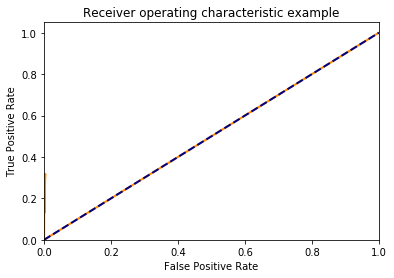

In [361]:

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()




In [346]:
tfidf_vect_ngram = TfidfVectorizer(sublinear_tf=True,ngram_range=(1, 2),max_features=20000)
tfidf_vect_ngram.fit(Xtrain)
#np.append(Xtrain,Xvalid)
xtrain_feature=features_generate(Xtrain)
xvalid_feature=features_generate(Xvalid)
#xtrain_feature.shape

In [347]:

predictions=train_model(LinearSVC(C=0.4), xtrain_feature, Ytrain , xvalid_feature)
check_results(predictions, Yvalid)

accuracy
0.990224032586558
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      2432
          1       0.44      0.17      0.25        23

avg / total       0.99      0.99      0.99      2455



In [350]:
fpr

array([0.        , 0.00205592, 1.        ])

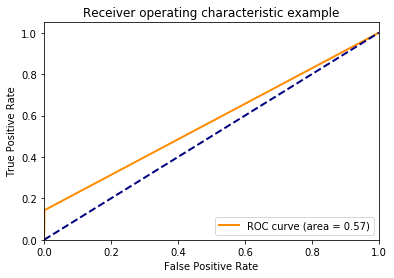

In [327]:
fpr, tpr, _ = roc_curve(Yvalid, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



In [6]:

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



classifiers = [
    KNeighborsClassifier(),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

def RUNSCV(classifiers,N) :
    recall={}
    for c in classifiers:
        recall[c]=[]
  
    for i in range(N):
        Xtrain,Xvalid,Ytrain,Yvalid=data_generate()
        tfidf_vect_ngram = TfidfVectorizer(ngram_range=(1, 2),max_features=10000)
        tfidf_vect_ngram.fit(Xtrain)
        xtrain_feature=features_generate(Xtrain,tfidf_vect_ngram)
        xvalid_feature=features_generate(Xvalid,tfidf_vect_ngram)
        for c in classifiers:
            preds=train_model(c, xtrain_feature, Ytrain , xvalid_feature)
            recall[c].append(recall_score(Yvalid, preds,average=None)[1])
        
    return(recall)

    

In [ ]:
recall=RUNSCV(classifiers,5)